<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/utils/interpolation_chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

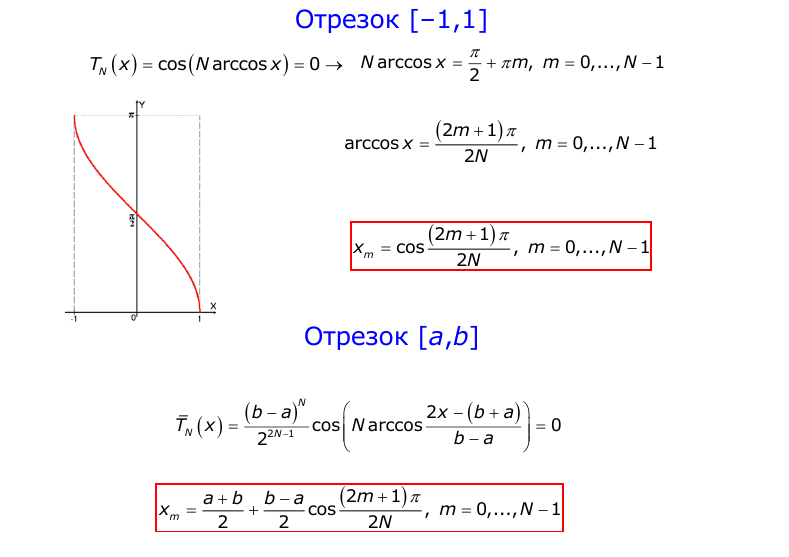

In [ ]:
def getUniformCheb(m, N):
    return math.cos((2*m + 1)*math.pi/(2*N))

def getCheb(m, N, a=-1, b=1):
    return ((a+b)/2) + ((b-a)/2)*getUniformCheb(m, N)

In [ ]:
N = 3
x = [getUniformCheb(m, N) for m in range(N)]
y = [1, 2.1697, 0.4609]

In [ ]:
x

[0.8660254037844387, 6.123233995736766e-17, -0.8660254037844387]

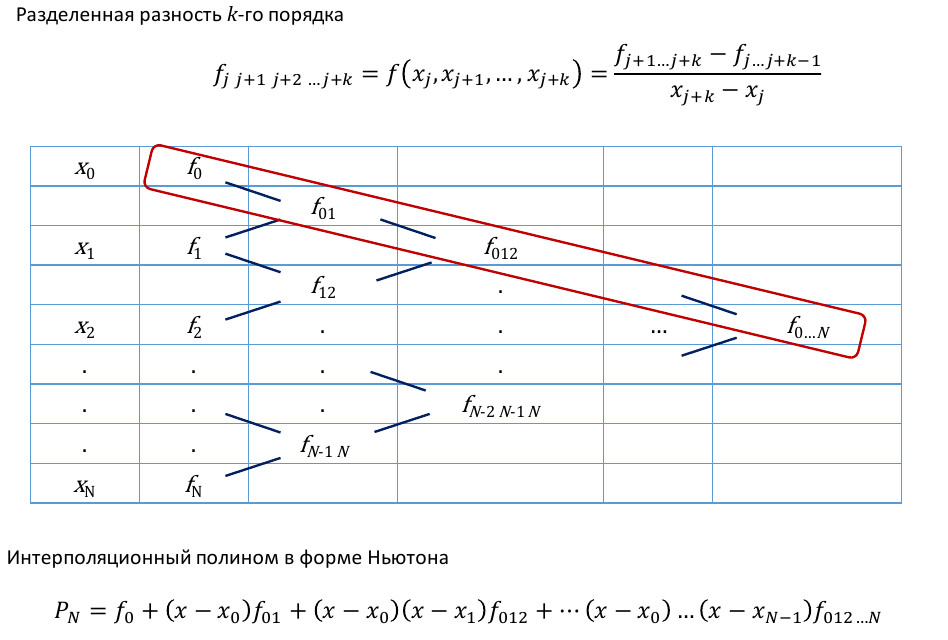

In [ ]:
def newton_coef(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j-1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0, :]

def polyValue(coef, x, x0):
    n = len(x) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x0 - x[n - k]) * p
    return p

In [ ]:
newton_coef(x, y)

array([ 1.        , -1.35065322, -1.919     ])

In [ ]:
def interpolate(x, y, points):
    a = newton_coef(x, y)
    n = len(x) - 1

    values = []
    for x0 in points:
        p = a[n]
        values.append(polyValue(a, x, x0))

    return values

In [ ]:
interpolate(x, y, [0.4])

[1.987159812048051]